In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Exploration

(Let's get the data and explore it):

In [2]:
df= pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Problem Statement: 
    we have a total of 7 variables in this dataset R&D ,spend,Administration,Marketing Spend,State,Profit . we will be trying to use  R&D ,spend,Administration,Marketing Spend and State as the dependent variables and will try to predict the Profit using Multiple linear Regression.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


As we have a Categorical variable in the dataset 'State' we will encode it using the get dummies method. 

In [6]:
State_x= df.iloc[: , :-1]
State_x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [7]:
s = pd.get_dummies (State_x['State'],drop_first=True)

In [8]:
State_x=State_x.drop('State',axis =1)

In [9]:
State_x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [10]:
State_x=pd.concat([State_x,s],axis=1)

In [11]:
df_test=pd.concat([State_x,df['Profit']],axis=1)
df1=df_test
df1.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94


Let's use Seaborn to plot some graphs to compare the relationships between the columns:

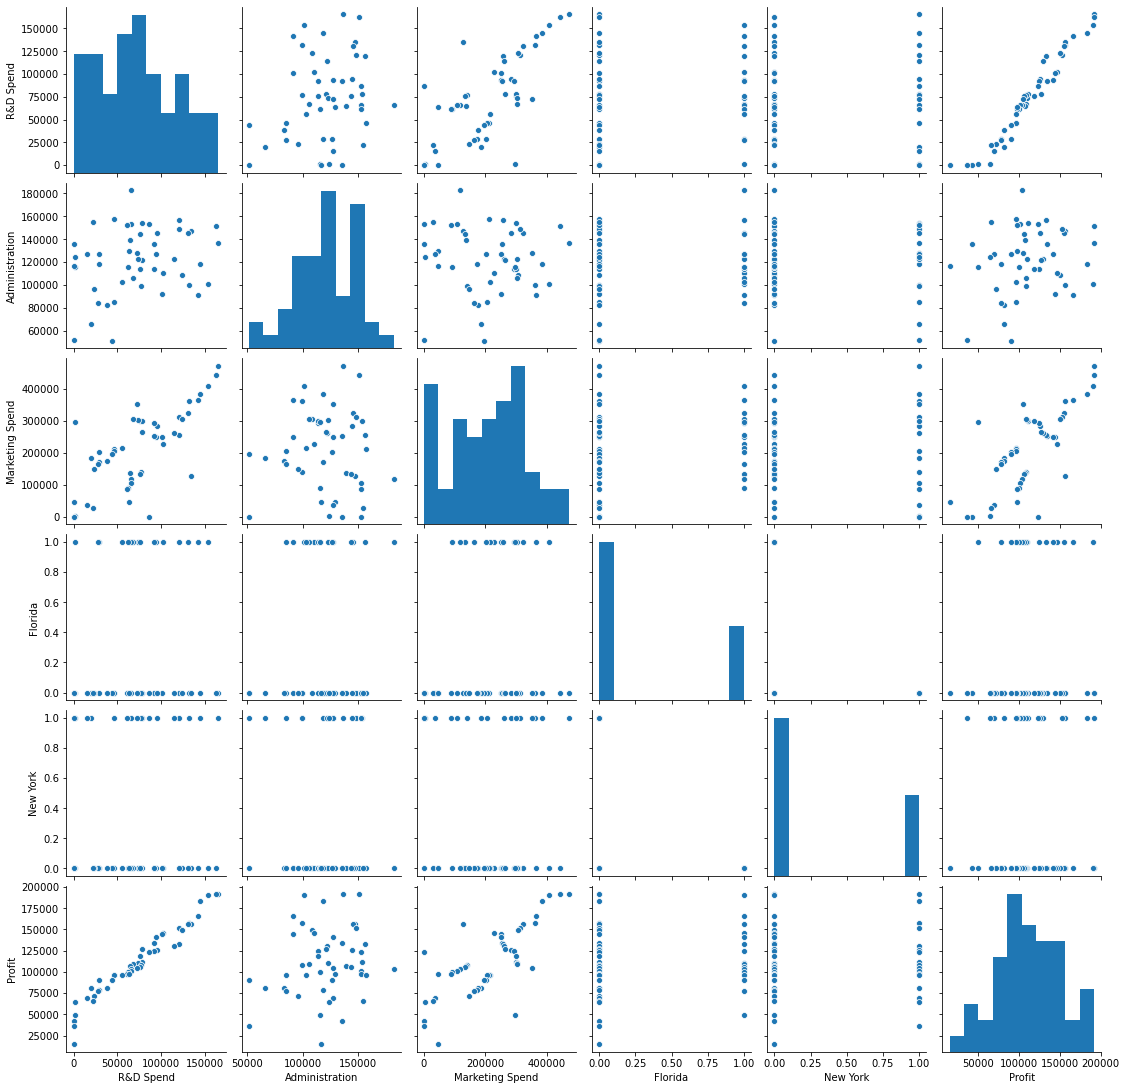

In [12]:
sns.pairplot(df1)

We can also construct a heatmap of these correlations:

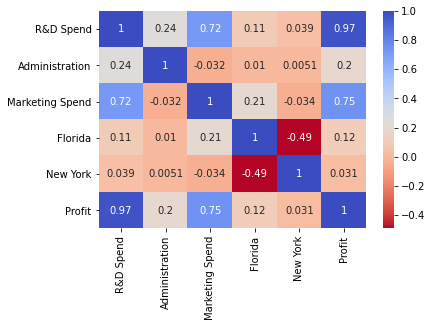

In [13]:
sns.heatmap(df1.corr(),cmap = 'coolwarm_r', annot=True)

We can see that there is a moderate correlation between Marketing spend and R&D spend also We can see that there is a strong correlation between  R&D spend and Profit.

# Splitting the Data

Let's split the data into training and testing data. The feature we are interested in predicting is the Profit.

In [14]:
df1.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94


In [16]:
X = df1[['R&D Spend', 'Administration','Marketing Spend','Florida','New York']]
y = df1['Profit']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
lm.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [24]:
lm.intercept_

42554.16761773238

# Predicting the Model

In [25]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

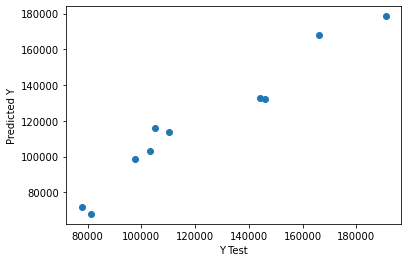

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

We can see that our model is pretty okay!

# Evaluating the Model

Let's calculate some errors:

In [28]:
from sklearn import metrics

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 7514.2936596406125
Mean Squared Error: 83502864.03257762
Root Mean Squared Error: 9137.990152794959


In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test , y_pred)
score

0.9347068473282423